# Exploring and Analyzing Text Data Assignment 

In [1]:
import spacy
import string
import pandas as pd
from nltk import pos_tag
from nltk.text import Text
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [33]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Read the CNN Lite plain text file articles into a corpus using the NLTK's PlaintextCorpusReader.

In [5]:
PATH = '/content/drive/MyDrive/Thinkful/NLP/cnn_articles/'

DOC_PATTERN = r'.*\.txt'

corpus = PlaintextCorpusReader(PATH, DOC_PATTERN)

### Iterate through the fileids in the corpus, extract the raw text of each document, and store them in a list.

In [6]:
dict_docs = {fileid:corpus.raw(fileid) for fileid in corpus.fileids()}

In [7]:
dict_docs

{'article_0.txt': 'Pink taking a break to focus on familyUpdated 10:18 AM ET, Thu November 14, 2019(CNN) - Pink has been working pretty hard and it sounds like she will be taking a step back in 2020.Speaking with "Entertainment Tonight" on the Country Music Association Awards red carpet, the singer was joined by her husband, Carey Hart, and their kids Willow, 8, and Jameson, 2.Pink was there to perform her song "Love Me Anyway" with country star Chris Stapleton, and she  talked about how hectic things have been. "We did two and a half years of [music] and Willow\'s back in school now, Jameson\'s going to start pre-school soon," Pink said. "It\'s kind of the year of the family."The star also praised her husband, with whom she will celebrate 14 years of marriage in January."Carey has a lot going on as well," she said of Hart, who went from being a professional motocross competitor to racing off-road trucks. "He\'s super supportive, he follows me around the world and now it\'s his turn."A

### Write a function that calculates the following statistics for a document and returns them as a list.

- Number of sentences
- Number of tokens
- Number of words (no stop words or punctuation)
- Number of unique words (vocabulary)
- Number of unique named entities (excluding numbers, dates, times, and currency types)
- Average sentence length
- Average word length
- Lexical diversity

In [8]:
def text_stats(doc):
  sents = sent_tokenize(doc)
  tokens = word_tokenize(doc)
  words = [token.lower() for token in tokens
           if not token.lower() in stopwords.words('english')
           if not token in string.punctuation]
  
  num_sents = len(sents)
  num_tokens = len(tokens)
  num_words = len(words)
  vocab = len(set(words))
  characters = sum([len(word) for word in words])

  spacy_doc = nlp(doc)
  remove = ['CARDINAL', 'DATE', 'TIME', 'ORDINAL', 'PERCENT', 'MONEY', 'QUANTITY']
  entities = [entity.text for entity in spacy_doc.ents
              if not entity.label_ in remove]
  
  num_entities = len(set(entities))
  words_sent = num_words / num_sents
  char_word = characters / num_words
  lex_div = vocab / num_words

  stats = [num_sents, num_tokens, num_words, vocab, num_entities, 
           words_sent, char_word, lex_div]
  
  return stats

In [9]:
stats = {key:text_stats(doc) for key, doc in dict_docs.items()}

### Iterate through all the documents, calculate these statistics for each one, and store all the results in a Pandas data frame.

In [10]:
stats_columns = ['Sentences', 'Tokens', 'Words', 'Vocabulary', 
                 'Entities', 'Avg_Sent_Length', 'Avg_Word_Length', 'Lexical_Diversity']



stats_df = pd.DataFrame.from_dict(stats, orient='index', columns=stats_columns).rename_axis('Document').reset_index()

In [11]:
stats_df

,Document,Sentences,Tokens,Words,Vocabulary,Entities,Avg_Sent_Length,Avg_Word_Length,Lexical_Diversity
0,article_0.txt,7,241,128,95,12,18.285714,5.273438,0.742188
1,article_1.txt,15,685,380,269,31,25.333333,6.297368,0.707895
2,article_10.txt,13,555,281,181,11,21.615385,5.594306,0.644128
3,article_11.txt,29,1029,545,338,39,18.793103,5.825688,0.620183
4,article_12.txt,68,1999,1055,607,78,15.514706,6.376303,0.575355
5,article_13.txt,47,1264,619,384,28,13.170213,5.810985,0.620355
6,article_2.txt,68,1790,1049,525,80,15.426471,5.442326,0.500477
7,article_3.txt,32,833,458,290,27,14.312500,5.810044,0.633188
8,article_4.txt,13,550,305,204,29,23.461538,6.537705,0.668852
9,article_5.txt,8,274,145,106,10,18.125000,5.172414,0.731034


### Summarize these statistics for the entire corpus by calling the Pandas `describe` method.

In [12]:
stats_df.describe()

,Sentences,Tokens,Words,Vocabulary,Entities,Avg_Sent_Length,Avg_Word_Length,Lexical_Diversity
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,30.500000,944.785714,513.785714,317.642857,34.714286,18.080184,5.970082,0.649588
std,21.302763,558.518532,310.149388,168.421453,23.407522,3.875462,0.500651,0.064843
min,7.000000,241.000000,128.000000,95.000000,10.000000,12.916667,5.172414,0.500477
25%,13.000000,551.250000,287.000000,186.750000,15.750000,15.245507,5.648240,0.621904
50%,29.000000,931.000000,501.500000,314.000000,29.500000,18.205357,5.934083,0.644738
75%,43.250000,1253.000000,670.750000,429.000000,38.250000,20.995690,6.356570,0.698134
max,68.000000,1999.000000,1055.000000,607.000000,80.000000,25.333333,6.873171,0.742188


### Choose a document from the list of documents you created earlier and generate a frequency distribution bar chart for it showing which terms appear most frequently in the text.

In [19]:
doc = list(dict_docs.values())[1]
doc

'Deval Patrick tells allies he\'s running for presidentUpdated 11:06 PM ET, Wed November 13, 2019(CNN) - Former Massachusetts Gov. Deval Patrick told friends and allies in phone calls on Wednesday that he has made a decision to run for president, two people familiar with the matter say.Plans for the timing of his formal announcement were still in flux Wednesday, with attention on impeachment, but a source familiar with the plans tells CNN that Patrick will officially file for the New Hampshire primary on Thursday in Concord after he appears on "CBS This Morning."The odds could be incredibly steep for a late entrant like Patrick, who is not well known nationally and does not have personal wealth to finance a campaign. Patrick has missed the deadline to appear on the primary ballot in Alabama and Arkansas. The deadline to file in New Hampshire is Friday.Patrick could seize upon potential advantages in early-voting states: He is from Massachusetts, which is next door to New Hampshire, hom

In [20]:
cleaned = [token.lower() for token in word_tokenize(doc)
          if token.lower() not in stopwords.words('english')
          if token.isalpha()]

fdist = FreqDist(cleaned)

In [21]:
fdist_df = pd.DataFrame.from_dict(fdist, orient='index', columns=['Count']).rename_axis('Word').reset_index()

In [24]:
filtered = fdist_df[fdist_df['Count'] > 1].sort_values('Count', ascending=False)
filtered.head()

,Word,Count
1,patrick,10
47,could,6
38,new,6
101,last,5
117,year,5


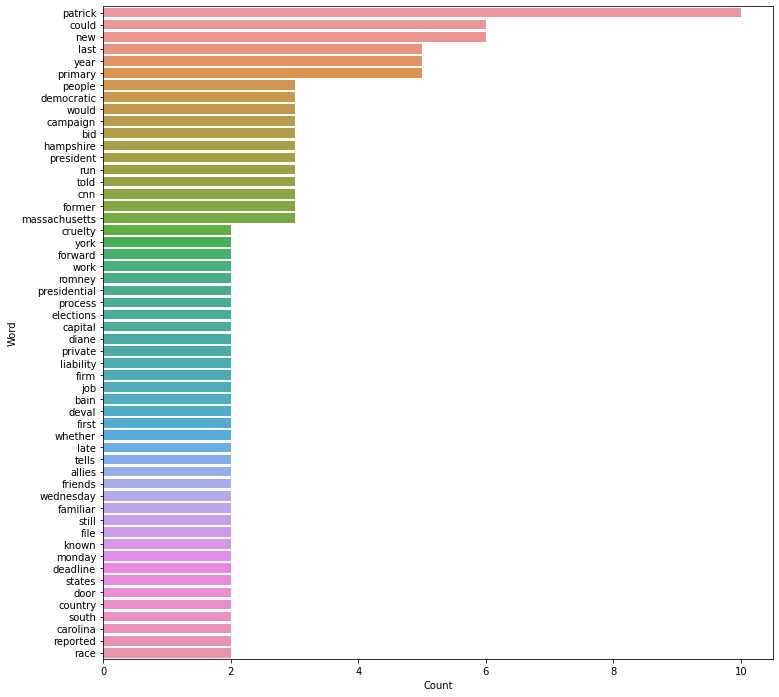

In [25]:
plt.figure(figsize=(12,12))
sns.barplot(data=filtered, x='Count', y='Word')
plt.show()

### Generate a word cloud visualization for the same document for which you generated the frequency distribution.

In [26]:
def wordcloud(text, colormap='tab10', background_color='white'):
  cloud = WordCloud(width=1600, height=800,
                    stopwords=STOPWORDS,
                    colormap=colormap,
                    background_color=background_color).generate(text)

  plt.figure(figsize=(12,10))
  plt.imshow(cloud)
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()

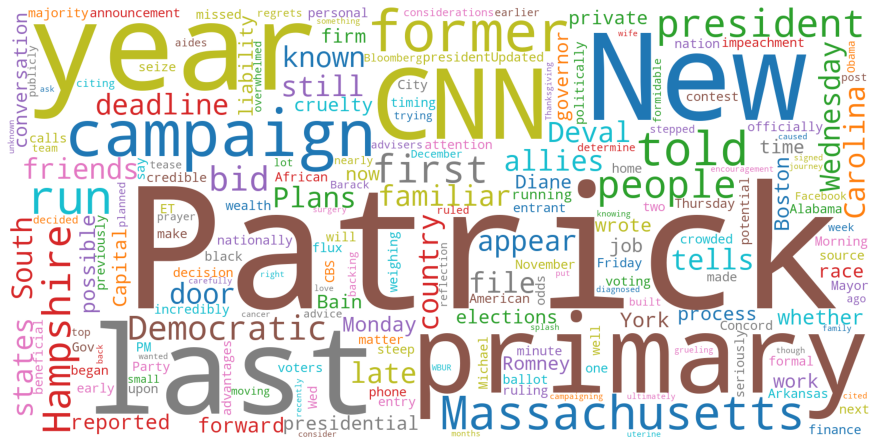

In [27]:
wordcloud(doc)

### Choose a different article (preferably one that references several named entities) and create a dispersion plot that shows the occurrence of those entities throughout the document.

In [29]:
doc2 = list(dict_docs.values())[3]
doc2

'Democrats\' 2020 uncertainty has heavyweights thinking about a runUpdated 12:48 AM ET, Wed November 13, 2019(CNN) - Three Democratic heavyweights this week have dangled the possibility of a 2020 White House run, a reflection of the extraordinarily unsettled nature of the Democratic field only a few months before voting begins.On the eve of the first public impeachment hearings, former New York Mayor Michael Bloomberg made a run to Arkansas on Tuesday to secure his spot on that state\'s Democratic primary ballot, should he decide to run. Former Massachusetts Gov. Deval Patrick weighed a late entry to the race while facing down Friday\'s filing deadline in the key state of New Hampshire. And Hillary Clinton coyly suggested, once again, that she could leap from the sidelines.Clearly enjoying the opportunity to taunt Trump at this vulnerable moment in his presidency -- and undoubtedly unnerving some current 2020 Democrats -- Clinton told BBC Radio that she was not running for president in

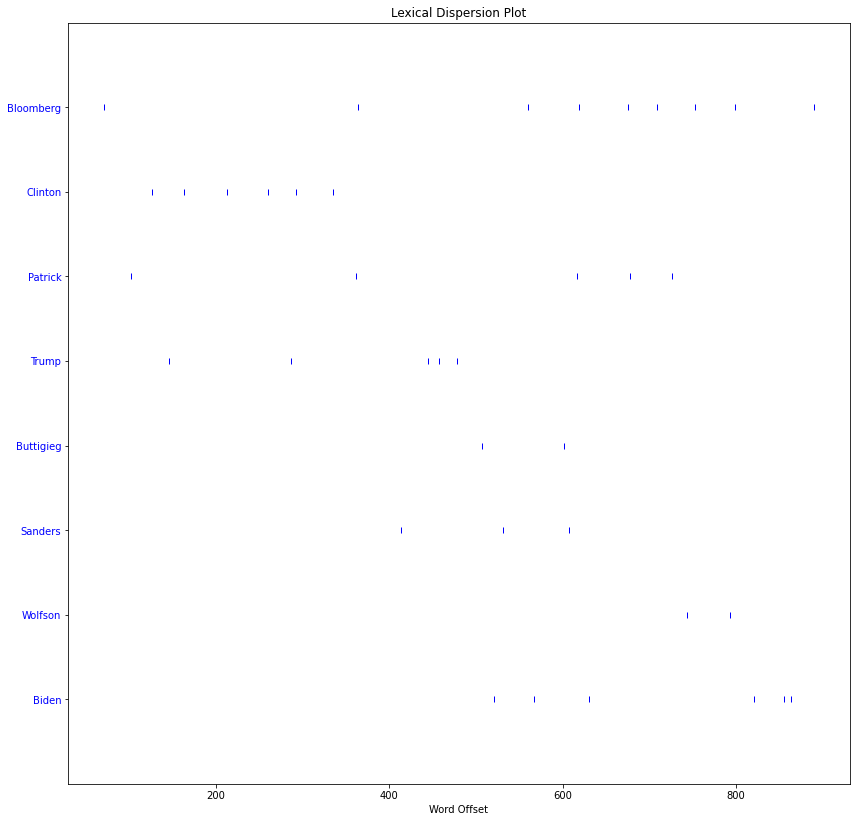

In [31]:
tokenized = word_tokenize(doc2)
figures = ['Bloomberg', 'Clinton', 'Patrick', 'Trump', 'Buttigieg', 'Sanders', 'Wolfson', 'Biden']

plt.figure(figsize=(14,14))
Text(tokenized).dispersion_plot(figures)
plt.show()

### Choose another article and generate a POS visualization highlighting the parts of speech for tokens in the article.

In [35]:
from yellowbrick.text.postag import PosTagVisualizer

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [37]:
tokens = word_tokenize(doc2)
tagged = pos_tag(tokens)

visualizer = PosTagVisualizer()
visualizer.transform(tagged)

print(' '.join((visualizer.colorize(token, color)
                for color, token in visualizer.tagged)))

Democrats ' 2020 uncertainty has heavyweights thinking about a runUpdated 12:48 AM ET , Wed November 13 , 2019 ( CNN ) - Three Democratic heavyweights this week have dangled the possibility of a 2020 White House run , a reflection of the extraordinarily unsettled nature of the Democratic field only a few months before voting begins.On the eve of the first public impeachment hearings , former New York Mayor Michael Bloomberg made a run to Arkansas on Tuesday to secure his spot on that state 's Democratic primary ballot , should he decide to run . Former Massachusetts Gov . Deval Patrick weighed a late entry to the race while facing down Friday 's filing deadline in the key state of New Hampshire . And Hillary Clinton coyly suggested , once again , that she could leap from the sidelines.Clearly enjoying the opportunity to taunt Trump at this vulnerable moment in his presidency -- and undoubtedly unnerving some current 2020 Democrats -- Clinton told BBC Radio that she was not running for 

#Lecture Notes

In [ ]:
docs = [corpus.raw(fileid) for fileid in corpus.fileids()]

doc = docs[1]

In [ ]:
cleaned = [token.lower() for token in word_tokenize(doc)
          if token.lower() not in stopwords.words('english')
          if token.isalpha()]

fdist = FreqDist(cleaned)

In [ ]:
fdist_df = pd.DataFrame.from_dict(fdist, orient='index', columns=['Count']).rename_axis('Word').reset_index()

In [ ]:
filtered = fdist_df.sort_values('Count', ascending=False)[fdist_df['Count'] > 1]
filtered

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Word,Count
1,patrick,10
38,new,6
47,could,6
117,year,5
40,primary,5
101,last,5
22,president,3
24,people,3
21,run,3
85,democratic,3


In [ ]:
def wordcloud(text, colormap='tab10', background_color='white'):
  cloud = WordCloud(width=1600, height=800,
                    stopwords=STOPWORDS,
                    colormap=colormap,
                    background_color=background_color).generate(text)

  plt.figure(figsize=(12,10))
  plt.imshow(cloud)
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()

In [ ]:
from pylab import rcParams

rcParams['figure.figsize']